In [1]:
import time 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/society/cdhit80_data_seq.csv")

In [3]:
from collections import Counter

def build_vocab(data):
    word_counts = Counter(row.lower() for sample in data for row in sample)
    vocab = [w for w, f in iter(word_counts.items())]
    return vocab

def k_mers(data, n):
    kmer_array = [[s[i:i + n].lower() for i in range(len(s) - n)] for s in data]
    vocab = build_vocab(kmer_array)
    # kmer_array = [[vocab.index(w) for w in row] for row in kmer_array]
    return kmer_array, vocab

In [4]:
kmer_array, vocab = k_mers(data['Sequence'], 4)

In [6]:
np.save("data/linear_features/cdhit80_k4_vocab", np.array(vocab))

In [7]:
np.load("data/linear_features/cdhit80_k4_vocab.npy")

array(['aggc', 'ggca', 'gcag', 'caga', 'agaa', 'gaac', 'aacg', 'acgg',
       'cggt', 'ggtc', 'gtcg', 'tcgc', 'cgcc', 'gccg', 'ccgc', 'cgcg',
       'gcgt', 'cgtc', 'gcct', 'cctc', 'ctca', 'tcag', 'cagc', 'agca',
       'gcac', 'cacg', 'cgga', 'ggac', 'gacc', 'acct', 'ctcc', 'tcca',
       'ccag', 'cagg', 'aggg', 'ggga', 'ggag', 'gagc', 'agct', 'gctc',
       'tcct', 'gcaa', 'caag', 'aaga', 'agat', 'gatc', 'atcc', 'cctg',
       'ctgc', 'tgcc', 'gcca', 'gggc', 'ggcg', 'gcgc', 'gccc', 'cccc',
       'ccct', 'agcg', 'gcga', 'cgat', 'gatt', 'attc', 'ttct', 'tctg',
       'ccgg', 'cggg', 'gggg', 'gggt', 'ggtg', 'gtgc', 'ctct', 'tctc',
       'cgtg', 'gtgg', 'tggt', 'gtcc', 'tccc', 'cccg', 'ggct', 'acga',
       'tgcg', 'gcgg', 'ctcg', 'tcgg', 'gtca', 'cagt', 'agtc', 'tcat',
       'catc', 'atcg', 'tcgt', 'ggtt', 'gttc', 'cggc', 'cgct', 'tctt',
       'cttc', 'ctgg', 'tggg', 'cgca', 'agtt', 'gact', 'actc', 'ccgt',
       'cgtt', 'cacc', 'accc', 'gctt', 'cttt', 'tttt', 'tttc', 'ttcg',
      

749


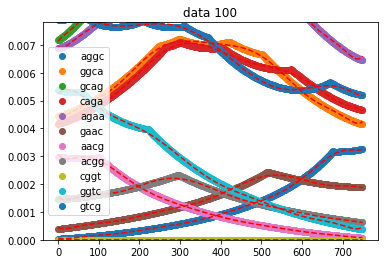

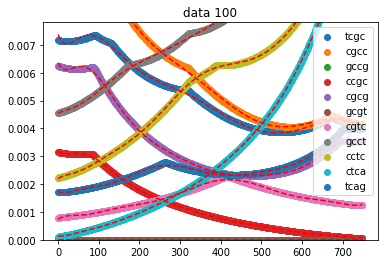

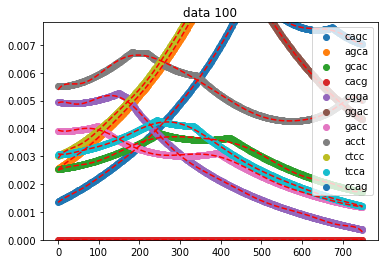

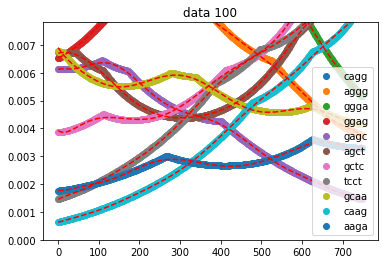

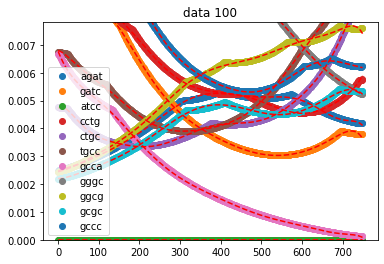

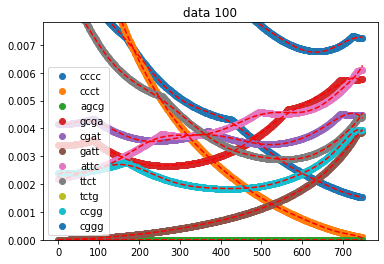

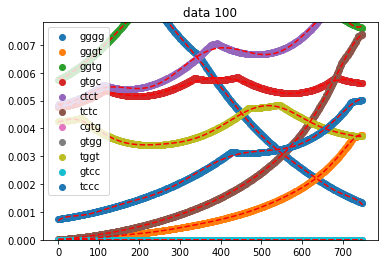

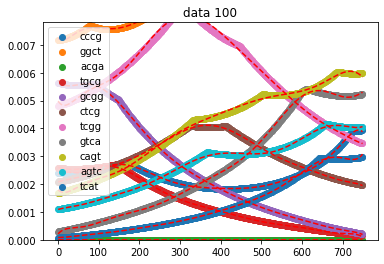

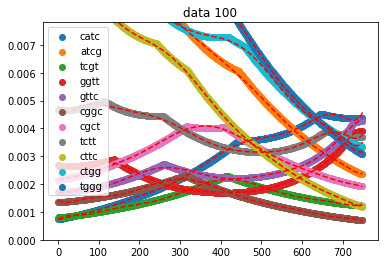

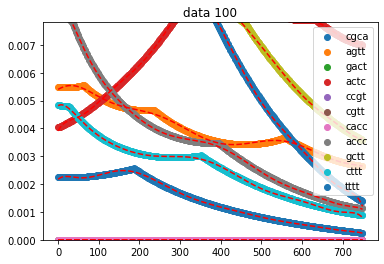

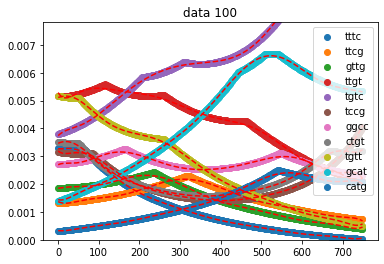

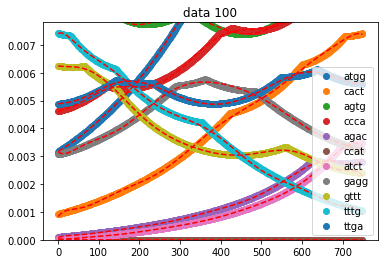

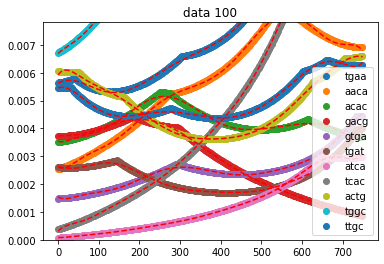

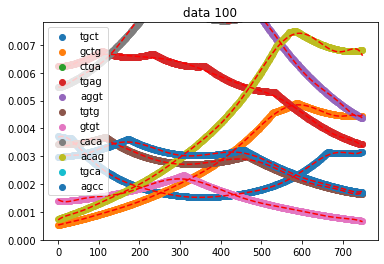

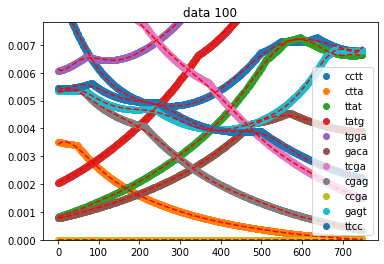

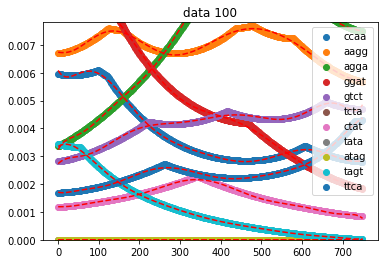

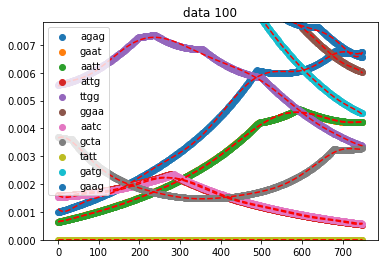

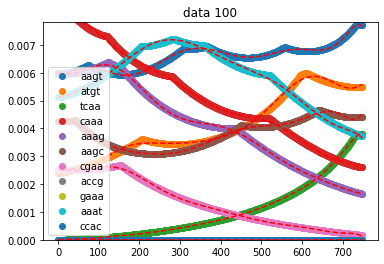

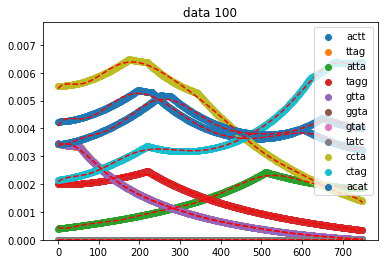

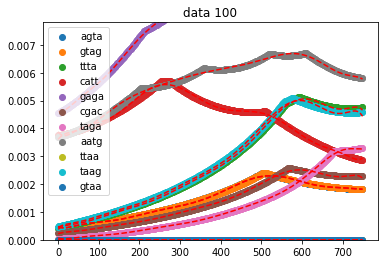

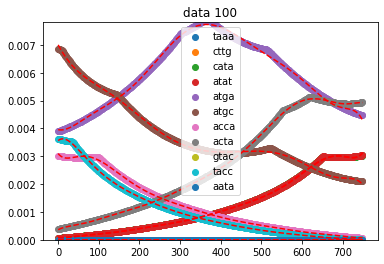

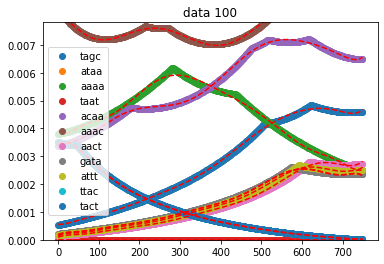

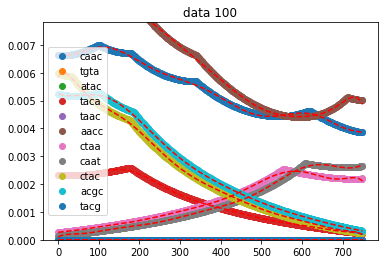

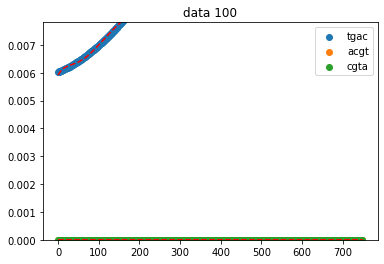

In [50]:
# V-2
# s = np.array(list("aatat"))
s = np.array(kmer_array[np.random.randint(len(kmer_array))])
print(len(s))
w = np.reshape(np.arange(len(s)), (-1, 1)) - np.arange(len(s))
w = np.abs(w) - w.max()
w = np.power(w - 1, 2)
L = np.sum(w, axis=0)

i = 0
for v in vocab:
    d = np.where(s == v, w, 0)
    d = np.sum(d, axis=1)
    d = d / L
    # nor
    # if d.max() - d.min():
    #     d = (d - d.min()) / (d.max() - d.min())
    z = np.polyfit(np.arange(len(d)), d, 10)
    p = np.poly1d(z)
    plt.scatter(np.arange(len(d)), d, label=v)
    t = np.arange(0, len(d), 0.01)
    plt.plot(t, p(t), 'r--')
    i += 1
    if i > 10:
        i = 0
        plt.ylim(0, (1 / len(vocab)) * 2)
        plt.title("data 100")
        plt.legend()
        plt.show()

plt.ylim(0, (1 / len(vocab)) * 2)
plt.title("data 100")
plt.legend()
plt.show()


In [5]:
def features_linear_encoder(data, vocab, power=10):
    features_data = []
    for s in data:
        s = np.array(s)
        t = time.time()
        w = np.reshape(np.arange(len(s)), (-1, 1)) - np.arange(len(s))
        w_abs = np.abs(w)
        w_max = (w.max() + 1)
        w = w_abs - w_max
        w = np.power(w , 2)
        L = np.sum(w, axis=0)
        
        linear_data = np.array([])
        for v in vocab:
            d = np.where(s == v, w, 0)
            d = np.sum(d, axis=1)
            d = d / L
            z = np.polyfit(np.arange(len(d)), d, power)
            linear_data = np.append(linear_data, z)
        features_data.append(linear_data.tolist())
        print("s:", len(s)," t:", time.time() - t)
    return features_data
features_data = features_linear_encoder(kmer_array, vocab=vocab)

s: 91667  t: 11382.85014629364


In [ ]:
features_output = pd.DataFrame(features_data)
features_output["len"] = [len(s) for s in data["Sequence"]]
features_output["Cytosolic"] = data["Cytosolic"]
features_output["Nucleus"] = data["Nucleus"]
features_output.to_csv("data/features_output_data.csv", index=False)

In [ ]:
for s in data:
    print(len(s))
    t = time.time()
    w = np.reshape(np.arange(len(s)), (-1, 1)) - np.arange(len(s))
    print("w:", time.time() - t)

    t = time.time()
    w_abs = np.abs(w)
    print("w_abs:", time.time() - t)

    t = time.time()
    w_max = (w.max() + 1)
    print("w_max:", time.time() - t)

    t = time.time()
    w = w_abs - w_max
    print("w_abs - w_max:", time.time() - t)

    t = time.time()
    w = np.power(w , 2)
    print("w:", time.time() - t)

    t = time.time()
    L = np.sum(w, axis=0)
    print("w_sum:", time.time() - t)
    break